# Assignment 02

## Exercise 01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

Let's suppose we have a set of observations $x=(x_1,…,x_N)^T$, that are drawn independent and identically distributed (i.i.d) from a Gaussian distribution with unknown mean $\mu$ and variance $\sigma^2$

For this example, we are going to assume that the unknown parameters are $\mu$=2 and $\sigma^2$=25 and the number of samples N=100.

In [2]:
mean = 2
variance = 25
std_dev = np.sqrt(25)
N = 100


### Task1:
Plot this (unknown) distribution together with the samples in the range [-20, 20].

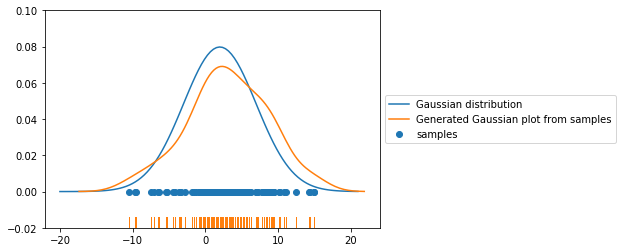

In [3]:
distribution = np.random.normal(loc = 2, scale = std_dev, size=N)
data= np.hstack(((distribution[:,np.newaxis]),np.zeros(distribution[:,np.newaxis].shape))) 

plt.plot(np.linspace(-20,21,100),plt.mlab.normpdf(np.linspace(-20,21,100), mean, std_dev),label = "Gaussian distribution")
sns.distplot(distribution,hist=False, rug=True, label = "Generated Gaussian plot from samples")
plt.scatter(data[:,0],data[:,1], label = 'samples')
plt.ylim(-0.02,0.1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Task2:
* Implement the likelihood function in python (you can simply use the existing python implementations)
* Use a general optimization method to find the values for $\mu$ and $\sigma^2$.

In [5]:
mu_calculated, std_dev_calulated = sp.stats.norm.fit(distribution)

print ("Sample Mean: ", mu_calculated,"; Sample Variance: ", std_dev_calulated**2)

Sample Mean:  2.204000840094931 ; Sample Variance:  24.199952656518185


In [6]:
x_i = data[:,0]
N_samples = (x_i.size)

sample_mean = 1/N_samples*np.sum(x_i)
sample_variance = (1/(N_samples-1))*np.sum((x_i-sample_mean)**2)

print ("Sample Mean: ", sample_mean,"; Sample Variance: ", sample_variance)


Sample Mean:  2.204000840094931 ; Sample Variance:  24.444396622745643


### Task3:

Given:
<br>
$\mu = \begin{bmatrix}
      0\\[0.3em]
      0\\[0.3em]
     \end{bmatrix}$
<br>
$\Sigma = \begin{bmatrix}
      0.5 & 0\\[0.3em]
      0 & 0.5\\[0.3em]
     \end{bmatrix}$
<br>
1. Visualise a Gaussian with the given parameters.
2. Visualise a marginal Gaussian.
3. Visualise a slice of Gaussian.

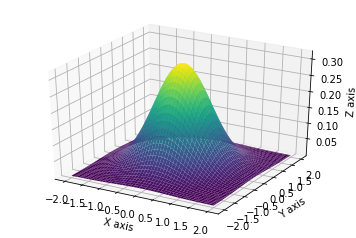

In [6]:
from matplotlib import cm
mu = np.array([0,0])
sigma = np.array([[0.5, 0],[0, 0.5]])

N = 100
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X,Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

rv = multivariate_normal(mu, sigma)
#dist = np.random.multivariate_normal(mu, [[variance_x, 0], [0, variance_y]],N)
Z = rv.pdf(pos)


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z ,cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# TODO
# Visualise a marginal Gaussian.?????

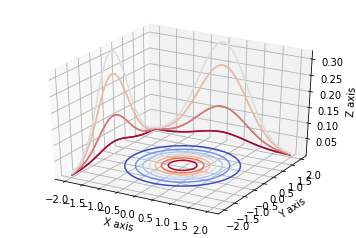

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=2, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-2, cmap=cm.coolwarm)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

### Task4: 

**Given**:

Number of samples is 1000 from them 330 samples are labeled as class $A$ and 670 samples are labeled as class $B$. There are 2 features $X1$ and $X2$. It is observed that  $p(A,X1)$=248,  $p(A,X2)$=82, $p(B,X1)$=168, $p(B,X2)$=502

**Compute**:

- Prior $p(A)$, $p(B)$
- Likelihood $p(X1|A)$, $p(X1|B)$
- Posterior $p(A|X1)$

In [10]:
N = 1000
N_A = 330
N_B = 670

P_AX1 =  0.248
P_AX2 = 0.082
P_BX1 = 0.168
p_BX2 = 0.502

P_A = N_A/N
P_B = N_B/N

P_X1_A =

print ("Prior P(A)=",P_A,",  P(B)=",P_B)

Prior P(A)= 0.33 ,  P(B)= 0.67
